In [1]:
# The code was removed by Watson Studio for sharing.

,ID,the_geom,Long,Lat,Station,Lines,Express,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
0,159,POINT (-73.96837899960818 40.799446000334825),-73.96838,40.79945,103rd St,1,0,36,61,19100,5,1500000US360610191005,360610191005,5,BG,29161,0
1,159,POINT (-73.96837899960818 40.799446000334825),-73.96838,40.79945,103rd St,1,0,36,61,19100,6,1500000US360610191006,360610191006,6,BG,22560,0
2,159,POINT (-73.96837899960818 40.799446000334825),-73.96838,40.79945,103rd St,1,0,36,61,19100,3,1500000US360610191003,360610191003,3,BG,16322,0
3,159,POINT (-73.96837899960818 40.799446000334825),-73.96838,40.79945,103rd St,1,0,36,61,19100,4,1500000US360610191004,360610191004,4,BG,21316,0
4,458,POINT (-73.94747800152219 40.79060000008452),-73.94748,40.79060,103rd St,1,0,36,61,16600,2,1500000US360610166002,360610166002,2,BG,24668,0


In [2]:
# The code was removed by Watson Studio for sharing.

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01
0,Id,Id2,Geography,Estimate; Median gross rent,Margin of Error; Median gross rent
1,1500000US360050001000,360050001000,"Block Group 0, Census Tract 1, Bronx County, N...",-,**
2,1500000US360050001001,360050001001,"Block Group 1, Census Tract 1, Bronx County, N...",-,**
3,1500000US360050002000,360050002000,"Block Group 0, Census Tract 2, Bronx County, N...",-,**
4,1500000US360050002001,360050002001,"Block Group 1, Census Tract 2, Bronx County, N...",1740,220


In [3]:
stations_select = stations[['ID','Station', 'Lines', 'Express','GEOID']]
stations_select['GEOID'] = stations_select['GEOID'].astype(str) 
rent_select = rent[['GEO.id2','HD01_VD01']]
rent_select['GEO.id2'] = rent_select['GEO.id2'].astype(str)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
merged_df = stations_select.merge(rent_select,left_on='GEOID',right_on='GEO.id2')
merged_df.head()

,ID,Station,Lines,Express,GEOID,GEO.id2,HD01_VD01
0,159,103rd St,1,0,360610191005,360610191005,1977
1,159,103rd St,1,0,360610191006,360610191006,1343
2,159,103rd St,1,0,360610191003,360610191003,1763
3,159,103rd St,1,0,360610191004,360610191004,1295
4,458,103rd St,1,0,360610166002,360610166002,1118


In [5]:
merged_df['HD01_VD01'] = pd.to_numeric(merged_df['HD01_VD01'],errors='coerce')
grouped = pd.DataFrame(merged_df.groupby('ID')['HD01_VD01'].mean()).reset_index()
grouped.head()

,ID,HD01_VD01
0,1,2987.0
1,3,3080.0
2,4,2091.4
3,5,1205.0
4,6,1509.0


In [6]:
merged_select = merged_df[['ID','Station','Lines','Express']].drop_duplicates()
final_df = merged_select.merge(grouped,on='ID')
final_df.columns = ['ID','Station','Lines','Express','Med Rent']
final_df.head()

,ID,Station,Lines,Express,Med Rent
0,159,103rd St,1,0,1594.500000
1,458,103rd St,1,0,997.250000
2,161,103rd St,2,0,1353.500000
3,94,59th St - Columbus Circle,5,1,2921.666667
4,356,5th Ave - 59th St,3,0,2419.333333


In [7]:
final_df[['Lines','Express','Med Rent']].corr()

,Lines,Express,Med Rent
Lines,1.000000,0.662056,0.373842
Express,0.662056,1.000000,0.233852
Med Rent,0.373842,0.233852,1.000000


In [8]:
from scipy import stats
express = final_df[final_df['Express']==1]['Med Rent'].dropna()
not_express = final_df[final_df['Express']==0]['Med Rent'].dropna()
stats.ttest_ind(express, not_express, equal_var = False)

Ttest_indResult(statistic=4.196564977232268, pvalue=6.2067844633720902e-05)

In [9]:
use_data = final_df.dropna()
x_data = use_data['Lines']
y_data = use_data['Med Rent']

slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
print("r-squared:", r_value**2)

r-squared: 0.139757587888


In [10]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o', label='Original Data')
plt.plot(x_data, intercept + slope*x_data, 'r', label='Fitted Line')
plt.legend()
plt.show()

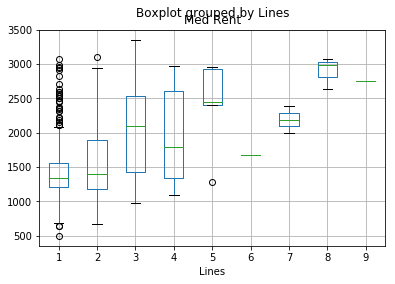

In [11]:
final_df.boxplot(column='Med Rent', by='Lines')

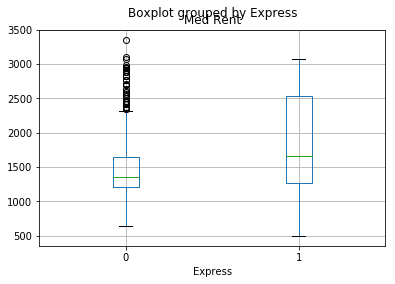

In [12]:
final_df.boxplot(column='Med Rent', by='Express')

In [13]:
list(final_df['Med Rent'])

[1594.5,
 997.25,
 1353.5,
 2921.6666666666665,
 2419.3333333333335,
 2422.6666666666665,
 1723.0,
 1895.3333333333333,
 1715.0,
 1290.6666666666667,
 1503.4,
 1454.6666666666667,
 1339.0,
 966.3333333333334,
 1549.0,
 1252.0,
 1425.25,
 854.25,
 872.75,
 811.75,
 1423.6666666666667,
 2004.6666666666667,
 1418.0,
 1317.5,
 1276.0,
 1206.0,
 1175.0,
 1112.0,
 1153.0,
 1090.4,
 697.0,
 883.0,
 883.0,
 494.0,
 1252.0,
 990.6,
 886.25,
 1095.3333333333333,
 1851.5,
 1804.6,
 2350.6,
 2052.6,
 1089.25,
 836.5,
 1174.1666666666667,
 1930.6666666666667,
 1312.0,
 1223.5,
 1260.0,
 1213.0,
 1112.0,
 1177.0,
 1122.6666666666667,
 970.5,
 1387.3333333333333,
 1070.0,
 1121.8,
 674.0,
 1154.5,
 1094.3333333333333,
 1037.3333333333333,
 1491.25,
 1240.0,
 1505.2,
 1211.8,
 1162.0,
 1324.3333333333333,
 1466.0,
 1292.75,
 1262.3333333333333,
 2152.0,
 2769.6666666666665,
 1705.6666666666667,
 1444.25,
 1182.25,
 1718.5,
 2113.8,
 1118.25,
 1202.6666666666667,
 1395.75,
 1325.5,
 1128.0,
 1229.25,
 